In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import imblearn
from imblearn.under_sampling import RandomUnderSampler
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#from pandas_profiling import ProfileReport
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neural_network import MLPClassifier 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


### 1. Import the data


In [ ]:
x_train = pd.read_csv('x_train_cat.csv')
x_test = pd.read_csv('x_test_cat.csv')
y_train = pd.read_csv('y_train_cat.csv')
y_test = pd.read_csv('y_test_cat.csv')

In [ ]:
print("the shape of X_train: " + str(x_train.shape))
print("the shape of Y_train: " + str(y_train.shape))
print("the shape of x_test: " + str(x_test.shape))
print("the shape of y_test: " + str(y_test.shape))

the shape of X_train: (387, 34)
the shape of Y_train: (387, 1)
the shape of x_test: (129, 34)
the shape of y_test: (129, 1)


### 2. Build Logit Model:

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Turn isbuyer into categorical data:
x_train['isbuyer'] = x_train['isbuyer'].astype('category').cat.codes

In [ ]:
#Drop Buyer_ID:
x_train.drop(['Buyer_ID'], axis = 1, inplace = True)
x_test.drop(['Buyer_ID'], axis = 1, inplace = True)


In [ ]:
x_train['Intercept'] = 1
x_test['Intercept'] = 1

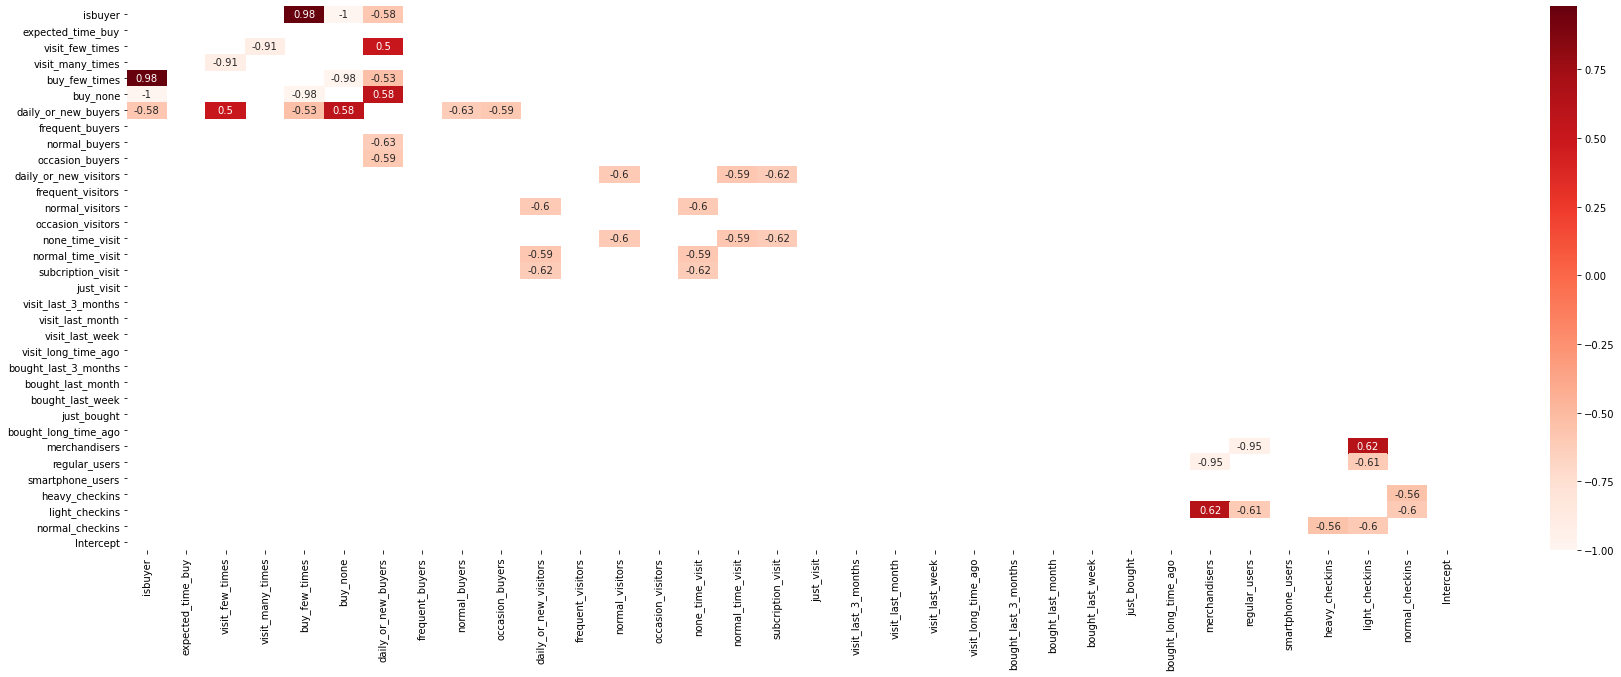

In [ ]:
dfCorr = x_train.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [ ]:
### Build OLS model to find significant variables without multicolinearity:
linear = sm.OLS(y_train, x_train).fit()
print (linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_buy   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     16.54
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           1.37e-38
Time:                        05:04:17   Log-Likelihood:                -133.65
No. Observations:                 387   AIC:                             307.3
Df Residuals:                     367   BIC:                             386.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
isbuyer                   0.36

In [ ]:
#Filter the significant variables:
x_train_trim = x_train[['isbuyer','visit_few_times','visit_many_times','frequent_buyers',
                        'frequent_visitors','normal_visitors','normal_time_visit',
                        'just_visit','visit_last_3_months','visit_last_week',
                        'visit_long_time_ago','bought_last_3_months','bought_last_week',
                        'just_bought','bought_long_time_ago','Intercept']]
x_test_trim = x_test[['isbuyer','visit_few_times','visit_many_times','frequent_buyers',
                        'frequent_visitors','normal_visitors','normal_time_visit',
                        'just_visit','visit_last_3_months','visit_last_week',
                        'visit_long_time_ago','bought_last_3_months','bought_last_week',
                        'just_bought','bought_long_time_ago','Intercept']]

In [ ]:
#Apply those filtered variables into the Logistic model:
logit_model = sm.Logit(y_train,x_train_trim).fit()
print(logit_model.summary())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



         Current function value: 0.383083
         Iterations: 35
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-070a33bb2332>", line 2, in <module>
    logit_model = sm.Logit(y_train,x_train_trim).fit()
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py", line 1902, in fit
    disp=disp, callback=callback, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py", line 217, in fit
    disp=disp, callback=callback, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line 477, in fit
    Hinv = np.linalg.inv(-retvals['Hessian']) / nobs
  File "<__array_function__ internals>", line 6, in inv
  File "/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py", line 546, in inv
    ainv = _umath_linalg.inv(a, si

LinAlgError: ignored

In [ ]:
#x_train_logit = x_train_trim[['isbuyer','frequent_visitors','normal_visitors',
#                              'Intercept']]

In [ ]:
#logit_model_2 = sm.Logit(y_train, x_train_logit).fit()
#print(logit_model_2.summary())

In [ ]:
#x_train_logit_3 = x_train_trim[['isbuyer', 'visit_few_times','visit_many_times','frequent_visitors','normal_visitors','normal_time_visit',
#                                'Intercept',
#                                'just_visit','visit_last_week','visit_long_time_ago',
#                              'just_bought',
                                ]]

## Seem like buy_freq and visit_freq are correlated with each other. ##

#logit_model_3 = sm.Logit(y_train, x_train_logit_3).fit()
#print(logit_model_3.summary())

In [ ]:
## Create model with significant variables: 
x_train_logit_4 = x_train_trim[['Intercept','isbuyer','frequent_visitors','normal_visitors',
                                'just_visit','visit_last_week']]
x_test_logit_4 =  x_test[['Intercept','isbuyer','frequent_visitors','normal_visitors',
                                'just_visit','visit_last_week']]                              
logit_model_4 = sm.Logit(y_train, x_train_logit_4).fit()
print(logit_model_4.summary())                               

Optimization terminated successfully.
         Current function value: 0.398023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  y_buy   No. Observations:                  387
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Jun 2021   Pseudo R-squ.:                  0.3634
Time:                        05:04:33   Log-Likelihood:                -154.04
converged:                       True   LL-Null:                       -241.96
Covariance Type:            nonrobust   LLR p-value:                 4.112e-36
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3604      0.224    -10.560      0.000      -2.799      -1.922
isbuyer 

In [ ]:
## Confusion matrix:
y_pred_logit = logit_model_4.predict(x_test_logit_4)
y_pred_logit = [ 0 if x < 0.5 else 1 for x in y_pred_logit]
print(metrics.confusion_matrix(y_test, y_pred_logit))
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_logit)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_logit)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_logit)*100) +" %")

[[74  6]
 [23 26]]
Accuracy: 77.51937984496125 %
Precision: 81.25 %
Recall: 53.06122448979592 %


In [ ]:
### Try to predict the regular y_test rather than the undersampled one: 



In [ ]:
# pd.concat([
#            logit_model_4.summary2().tables[0],
#            logit_model_4.summary2().tables[1]
#           ], axis = 0, ignore_index = True)

logit_model_4.summary2().tables[0].to_csv("Log_Cat_Mod_1.csv")
logit_model_4.summary2().tables[1].to_csv("Log_Cat_Mod_2.csv")

### 3. Just trying to build a Decision Tree:


In [ ]:
from sklearn import tree

Firstly, I will try to pre-prunning the tree based on max_dept, min_sample_leaf, min_sample_split. The first parameter will be max_depth, as this will directly affect how the tree can be visualized


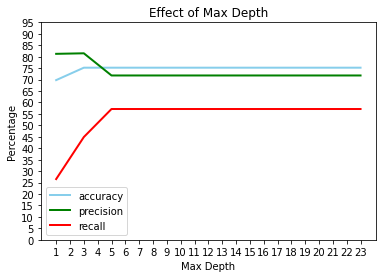

In [ ]:
accuracy = []
precision = []
recall = []
xaxis = range(1,25,2)
for x in range(1,25,2):

    # Decison tree model 
    clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                      max_depth=x, max_features=None, 
                                      max_leaf_nodes=None, min_samples_leaf=10, 
                                      min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                      random_state=100, splitter='best')
    clf = clf.fit(x_train, y_train)

    y_pred_tree = clf.predict(x_test)  
    
    accuracy.append(metrics.accuracy_score(y_test,y_pred_tree)*100)
    precision.append(metrics.precision_score(y_test,y_pred_tree)*100)
    recall.append(metrics.recall_score(y_test,y_pred_tree)*100)
        # Confusion Matrix - Decision Tree Model 

plt.plot( xaxis, accuracy,   color='skyblue', linewidth=2, label = 'accuracy')
plt.plot( xaxis, precision,   color='green', linewidth=2, label = 'precision')
plt.plot( xaxis, recall,   color='red', linewidth=2,  label="recall")
plt.title('Effect of Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Percentage')
plt.yticks(np.arange(0, 100, 5.0))
plt.xticks(np.arange(min(xaxis), max(xaxis)+1, 1.0))
plt.legend()

It can be seen that after max_dept =5, the rates stay unchanged. 
However, 5 would resulted in a small tree with lack of descriptive features, So I will choose the optimum max_depth = 10.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

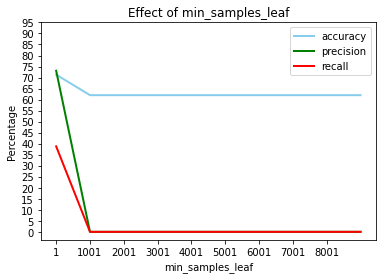

In [ ]:
# Pre-prunning for min_sample_leaf:
accuracy = []
precision = []
recall = []
xaxis = range(1,10000,1000)
for x in range(1,10000,1000):

    # Decison tree model 
    clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                      max_depth=10 #choosen by above
                                      , max_features=None, 
                                      max_leaf_nodes=None, min_samples_leaf=x, 
                                      min_samples_split=2, min_weight_fraction_leaf=0.0, 
                                      random_state=100, splitter='best')
    clf = clf.fit(x_train, y_train)

    y_pred_tree = clf.predict(x_test) 
    
    accuracy.append(metrics.accuracy_score(y_test,y_pred_tree)*100)
    precision.append(metrics.precision_score(y_test,y_pred_tree)*100)
    recall.append(metrics.recall_score(y_test,y_pred_tree)*100)

plt.plot( xaxis, accuracy,   color='skyblue', linewidth=2, label = 'accuracy')
plt.plot( xaxis, precision,   color='green', linewidth=2, label = 'precision')
plt.plot( xaxis, recall,   color='red', linewidth=2,  label="recall")
plt.title('Effect of min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Percentage')
plt.yticks(np.arange(0, 100, 5.0))
plt.xticks(np.arange(min(xaxis), max(xaxis), 1000.0))
plt.legend()

Based on this figure, evidently min_sample_leaf = 1 is the optimum choice.

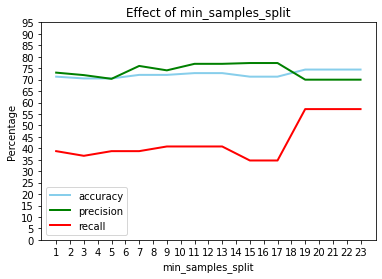

In [ ]:
# Pre-prunning for min_sample_split
accuracy = []
precision = []
recall = []
xaxis = range(1,25,2)
for x in range(2,25,2):

    # Decison tree model 
    clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                      max_depth=10 #choosen by above
                                      , max_features=None, 
                                      max_leaf_nodes=None, min_samples_leaf=1, # choosen by above
                                      min_samples_split=x, min_weight_fraction_leaf=0.0, 
                                      random_state=100, splitter='best')
    clf = clf.fit(x_train, y_train)

    y_pred_tree = clf.predict(x_test)  
    
    accuracy.append(metrics.accuracy_score(y_test,y_pred_tree)*100)
    precision.append(metrics.precision_score(y_test,y_pred_tree)*100)
    recall.append(metrics.recall_score(y_test,y_pred_tree)*100)

plt.plot( xaxis, accuracy,   color='skyblue', linewidth=2, label = 'accuracy')
plt.plot( xaxis, precision,   color='green', linewidth=2, label = 'precision')
plt.plot( xaxis, recall,   color='red', linewidth=2,  label="recall")
plt.title('Effect of min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Percentage')
plt.yticks(np.arange(0, 100, 5.0))
plt.xticks(np.arange(min(xaxis), max(xaxis)+1, 1.0))
plt.legend()

The optimal min_sample_split should be 20. 
Now with all of the above prunning techniques, I will go ahead and build the tree:

In [ ]:
#Decision Tree Model:
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', 
                                  max_depth=10 #choosen by above
                                  , max_features=None, 
                                  max_leaf_nodes=None, min_samples_leaf=1, 
                                  min_samples_split=20, min_weight_fraction_leaf=0.0, 
                                  random_state=100, splitter='best')
clf = clf.fit(x_train, y_train)

y_pred_tree = clf.predict(x_test) 

#     accuracy.append(metrics.accuracy_score(y_testDFA3,y_predDFA3)*100)
#     precision.append(metrics.precision_score(y_testDFA3,y_predDFA3)*100)
#     recall.append(metrics.recall_score(y_testDFA3,y_predDFA3)*100)
#Confusion Matrix - Decision Tree Model 
print(metrics.confusion_matrix(y_test, y_pred_tree))

print ("Accuracy: " + str( round(metrics.accuracy_score(y_test, y_pred_tree)*100,2))+" %")
print ("Precision: "+ str( round(metrics.precision_score(y_test, y_pred_tree)*100,2)) + " %")
print ("Recall: "+ str( round(metrics.recall_score(y_test, y_pred_tree)*100,2)) +" %")


[[68 12]
 [21 28]]
Accuracy: 74.42 %
Precision: 70.0 %
Recall: 57.14 %


In [ ]:
# PLot the tree:
from graphviz import Source
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x_train.columns)
graph = graphviz.Source(dot_data) 
graph.render("happytree",view = True)

tree.export_graphviz(clf, out_file= 'Minh_Tree_categorical.dot', feature_names=x_train.columns, class_names = True)



### 4. Build a Logit model but with non-undersampled data set: 

In [ ]:
#Load in the original train_cat data:
train_cat = pd.read_csv('train_categorical_no_undersample.csv')

In [ ]:
#split into trainining and test data: 
X = train_cat.drop(['y_buy'], axis = 1 )
Y = train_cat[['y_buy']]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)

In [ ]:
print("the shape of X_train: " + str(x_train.shape))
print("the shape of Y_train: " + str(y_train.shape))
print("the shape of x_test: " + str(x_test.shape))
print("the shape of y_test: " + str(y_test.shape))

the shape of X_train: (28656, 33)
the shape of Y_train: (28656, 1)
the shape of x_test: (9553, 33)
the shape of y_test: (9553, 1)


In [ ]:
y_pred_logit = logit_model_4.predict(x_test) # Not working. hmmmm
y_pred_logit = [ 0 if x < 0.5 else 1 for x in y_pred_logit]
print(metrics.confusion_matrix(y_test, y_pred_logit))
print ("Accuracy: " + str( metrics.accuracy_score(y_test, y_pred_logit)*100)+" %")
print ("Precision: "+ str( metrics.precision_score(y_test, y_pred_logit)*100) + " %")
print ( "Recall: "+ str( metrics.recall_score(y_test, y_pred_logit)*100) +" %")

ValueError: ignored